# 제4절 Single Linear Regression

## 사례 1

#### Single Linear Regression 1
by pytorch

In [1]:
import numpy as np
number_of_points = 500

In [2]:
# x 축과 y 축의 두 리스트를 초기화 한다.
x_point , y_point = [], []

In [3]:
# 선형관계를 정의하는 weight 와 bias 의 상수 값을 임의로 지정한다
w = 0.22
b = 0.78

In [4]:
for i in range(number_of_points):
    x = np.random.normal(0, 0.5)
    y = w * x + b + np.random.normal(0,0.1)
    x_point.append([x])
    y_point.append([y])

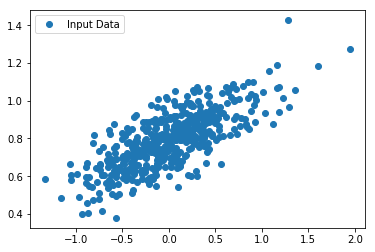

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_point, y_point, 'o', label = "Input Data")
plt.legend()
plt.show()

In [6]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [7]:
# X 와 Y 를 정의한다
# x_point, y_point 위에서 생성한 데이터를 사용한다
X = Variable(torch.Tensor(x_point))
Y = Variable(torch.Tensor(y_point))

In [8]:
# 가설함수를 정의 : Y = XW + b
model = nn.Linear(1,1,bias = True)
# Cost 함수를 정의 (평균제곱오차)
criterion = nn.MSELoss()
# learning rate 와 최적화 모델을 정의한다
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [12]:
# 학습모델 만들기
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)            # 가설함수 정의
    cost = criterion(hypothesis, Y)  # cost함수 정의
    cost.backward()                  # cost backward 를 실행
    optimizer.step()                 # 최적화 단계를 실행

    if step % 1000 == 0:
        print(step,
        cost.data.numpy(),
        model.weight.data.numpy(),
        model.bias.data.numpy() )  # .numpy() - array 객체로 value만 출력한다

0 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
1000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
2000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
3000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
4000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
5000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
6000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
7000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
8000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
9000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]
10000 [ 0.00947106] [[ 0.22959417]] [ 0.79009211]


#### Single Linear Regression 2
by pytorch

In [13]:
# 관련 라이브러리를 불러온다
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable

In [14]:
# 데이터를 생성한다.
num_data = 1000
num_epoch = 1000
noise = init.normal(torch.FloatTensor(num_data,1),std=0.2)
x = init.uniform(torch.Tensor(num_data,1),-10,10)
y = 2*x+3
y_noise = 2*(x+noise)+3

In [15]:
# 선형모델을 정의
model = nn.Linear(1,1)
output = model(Variable(x))
# loss function 및 optimizer 를 정의
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [16]:
# 학습모델 생성
loss_arr =[]
label = Variable(y_noise)
for i in range(num_epoch):
    output = model(Variable(x))
    optimizer.zero_grad()
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(i, loss.data.numpy(),
            model.weight.data.numpy(),
            model.bias.data.numpy())

0 [ 6.98669147] [[ 0.80574739]] [-0.96700054]
100 [ 3.11842537] [[ 1.73617041]] [-0.08264828]
200 [ 2.12326336] [[ 1.84725344]] [ 0.90868282]
300 [ 1.13030028] [[ 1.96015513]] [ 1.89867032]
400 [ 0.39413339] [[ 1.99931192]] [ 2.7375226]
500 [ 0.32142475] [[ 1.99937642]] [ 2.97494245]
600 [ 0.32011783] [[ 1.99802148]] [ 3.00500441]
700 [ 0.32011247] [[ 1.99799109]] [ 3.00664663]
800 [ 0.3201125] [[ 1.99833286]] [ 3.00746775]
900 [ 0.32011169] [[ 1.99820232]] [ 3.00824881]


In [19]:
# 학습 모델을 테스트 한다
predicted = model(Variable(torch.Tensor([[1]])))
print('1 : ' , predicted.data.numpy())
predicted = model(Variable(torch.Tensor([[2]])))
print('2 : ', predicted.data.numpy())
predicted = model(Variable(torch.Tensor([[3], [4]])))
print('3,4 : ', predicted.data.numpy())

1 :  [[ 5.00660467]]
2 :  [[ 7.00504112]]
3,4 :  [[  9.0034771 ]
 [ 11.00191307]]
